# Aproximación a INTEGRALES por medio de Monte Carlo Acierto y Error (Hit or Miss) con METODOLOGÍA

### 1. Identifique las variables 

Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.

### 2. Determine la distribución de probabilidad

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.

### 3. Modele las variables aleatorias 

Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

### 4. Defina el modelo del sistema y los objetivos de la simulación 

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas. 

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real **validando** el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

### 5. Diseñe el experimento

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.

### 6. Repita el experimento $n$ veces 

Así dispondrá de $n$ observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El **método Monte Carlo** se basa en la **Ley Fuerte de los Grandes Números** y el **Teorema del Límite Central**.

# **Por simulación: Construimos el modelo en varios pasos.**

**PASO 1**. Defina las variables que intervienen en el modelo.

Definimos $u_1, u_2 \sim U(0,1)$, como varibles aleatorias que nos sirven generar muestras aleatorias de una distribución específica, lo que nos servira para estimar la integral antes planteada.

**PASO 2**. Formule la distribución de probabilidad de cada variable.

$$
f(u_1)= 
\begin{cases} 
1 & \text{si } 0 \leq u_1 \leq 1 \\
0 & \text{en cualquier otro lugar}
\end{cases}
$$

$$
f(u_2) = 
\begin{cases} 
1 & \text{si } 0 \leq u_2 \leq 1 \\
0 & \text{en cualquier otro lugar}
\end{cases}
$$

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

$$
F(u_1) = 
\begin{cases} 
0 & \text{si } u_1 < 0 \\
u_1 & \text{si } 0 \leq u_1 \leq 1 \\
1 & \text{si } u_1 > 1
\end{cases}
$$

$$
F(u_2) = 
\begin{cases} 
0 & \text{si } u_2 < 0 \\
u_2 & \text{si } 0 \leq u_2\leq 1 \\
1 & \text{si } u_2 > 1
\end{cases}
$$

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|    Variables |**u1**|**u2**|
|------|-------|----------|
|Intervalo|     (0,1)   |  (0,1)  |



**PASO 5**. Genere números aleatorios.

In [1]:
import numpy as np
import random
u1 = random.uniform(0,1)
u2 = random.uniform(0,1)

**PASO 6**. Simule un lanzamiento de un dardo.

Del algoritmo de Monte Carlo Acierto y Error, $(u_{1_i},u_{2_i})$ forman pares ordenados, y se calcula $X_i=a+u_{1_i}(b-a)$ y enseguida $g(X_i)$ 
entonces $N_H$ cuenta el numero "aciertos", es decir, las veces que el punto cae debajo de la integral, y esto pasa cuando se cumple que $g(X_i)>c u_{2_i}$.

$a,b$ y $c$ se eligen de tal forma que formen un área rectangular que contenga la región sobre la cual se está integrando.

Si $g(X_i) > cu_2$ 

¿Ocurre lo de arriba? = **Acierto = 1**

Si $g(X_i) \leq cu_2$ 

¿Ocurre lo de arriba? = **Error = 0**


**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para 
garantizar la convergencia del resultado.

In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# **Definimos la función a integrar en cierto intervalo**

In [3]:
def funcion(x): #Definimos la función a la cual le queremos calcular la integral en cierto intervalo.
    return math.exp(math.exp(x))

Como ejemplo utilizamos la función:
\begin{equation*}
\begin{aligned}
 I = \int_0^1 exp(e^x) \quad dx
\end{aligned}
\end{equation*}

El siguiente codigo aplica el método de acierto y erro para calcular la integral antes definida, recordando que el limite inferior se denota por **a** y el limite superir por **b**. Además que **c** es la función en este caso constante que acota por arriba a nuestra función a integrar. 

In [4]:
def experimentos(n): #Definimos una funcion que realizara 
  a=0 #limite inferior de la integral
  b=1 #limite superior de la integral
  c = 16 #Funcion que acota por arriba la funcion a integrar.
  aciertos = 0 #Contador de la cantidad de veces que se cumple la condicion de monte carlo acierto y error.
  area=[] #Guardara las aproximaciones del área bajo la curva de la función.
  ensayos=[]
  for i in range(1,n+1):
      u1=(random.random()) #Generamos un número aleatorio en (0,1)
      u2=(random.random()) #Generamos un segundo número aleatorio e independiente en (0,1)
      x = (b-a)*u1+a #Utilizamos la tranformada inversa para traslar el U1 en el intervalo (0,1) al intervalo de interes (intervalo en donde se integra)
      g_x = funcion(x) #Evaluamos la función a integrar en el aleatorio X generado anteriormente. 
      if g_x > c*u2: #Condición de Monte Carlo de Acierto y Error. 
        aciertos += 1 #Si se cumple la condición anterior, aumenta el contador el 1.
      ensayos.append(i) #Se va guardando en una lista la iteración i.
      area.append(c*(b-a)*aciertos/i) #Se va guardadndo la aproximación a la integral en la iteración i.
  return area #Regresamos una lista de las aproxiamciones al valor de la integral de todas las iteraciones. 

In [5]:
exp = experimentos(1500) #Hara el experimento antes descrito 1500 veces, es decir, nos dara 1500 aproximaciones 
#al valor de la integral para ver cuando se logra estabilizar.

In [6]:
np.mean(exp) #Saca la media de los experimentos, eso nos dará una idea de la aproximación al valor de la integral de la función en (a,b).

5.863053770691936

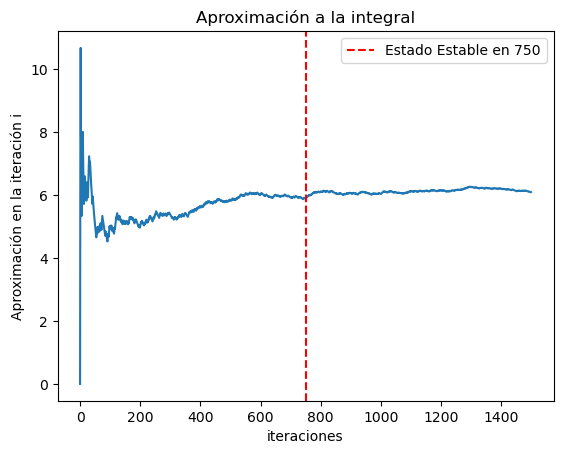

In [8]:
plt.plot(exp) #Grafica la lista de aproximaciones de acuerdo a la cantidad de experimentos realizados.
plt.xlabel('iteraciones')
plt.ylabel('Aproximación en la iteración i')
plt.title('Aproximación a la integral')

# Agrega una línea vertical en la iteración 750 que de manera visual es donde comienza el estado estable.
plt.axvline(x=750, color='red', linestyle='--', label='Estado Estable en 750')

plt.legend()  # Muestra la leyenda si es necesario
plt.show()

**PASO 8**. Replique el modelo.

In [9]:
def valor(repeticiones): #Esta función hara la simulacion anterior muchas veces, es decir, hará "repeticiones" cantidad de veces
    Area = []
    for i in range(repeticiones):
        Area.append(np.mean(experimentos(750))) #Calcula la media de 750 experiementos unas N (repeticiones) cantidad de veces.
    return Area #Nos regresa N (repeticiones) medias de 750 experiemntos cada una.

In [10]:
N=100
simulacion = valor(N)

In [11]:
np.mean(simulacion) #Saca la media de las N simulaciones realizadas, eso nos dará una mejor de la aproximación al valor de la integral.

6.37928634888837

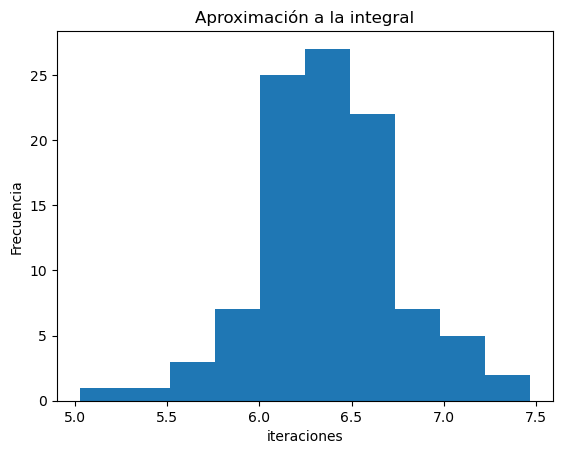

In [12]:
plt.hist(simulacion) #Grafica las frecuencias de la aproximación al valor de la integral de las N simualciones con 2000 experiementos cada una.
plt.xlabel('iteraciones')
plt.ylabel('Frecuencia')
plt.title('Aproximación a la integral')
plt.show()

**PASO 9**. Calcule la media del área bajo la curva de la función y su desviación estándar.

In [13]:
media = np.mean(simulacion) #Calcula la media de esas N simulaciones
var = np.var(simulacion) #Calcula la varianza de esas N simulaciones
desv = np.std(simulacion) #Calcula la desvaicion de esas N simulaciones

**PASO 10**. Halle el intervalo de confianza del valor de la integral con un nivel de confianza del $95 \%$.
\begin{equation*}
\overline{x}- Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}} < \mu < \overline{x}+ Z_{\frac{\alpha}{2}}  \cdot \frac{S}{\sqrt{N}}
\end{equation*}

In [14]:
from scipy.stats import norm #Importamos la libreria para poder obtener el valor de Z.
alpha = 1 - 0.95 #Alpha es igual a 1 - la confianza del intervalo
z_alpha_2 = norm.ppf(1-alpha / 2) #Mandamos a pedir el valor de Z para \alpha/2, sabemos que si es el 95% de confienza, Z esta cercano al 1.96.
l_inferior = media - z_alpha_2 * (desv / math.sqrt(N)) #Sacamos limite inferior por la formula
l_superior = media + z_alpha_2 * (desv / math.sqrt(N)) #Sacamos limite superior por la formula
print("Entonces: ", l_inferior, "< \u03BC <", l_superior) #El intervalo en donde se encuentra el valor real a una confienza del 95%

Entonces:  6.302941340257109 < μ < 6.455631357519631
